# K-Nearest Neighbors (KNN) y Regresión Logística

Elaborado por: **Gabriel Armando Landín Alvarado**

## Contenido

- ¿Qué es el algoritmo KNN?
-  Conociendo los datos
-  Normalizar los datos
-  Clasificación
-  Evaluación de la precisión
-  ¿Qué es la regresión logística?
-  Conociendo los datos
-  Clasificación
-  Evaluación del modelo
-  K-Fold o Validación Cruzada

## ¿Qué es el algoritmo KNN?

El algoritmo K-Nearest Neighbors (KNN), o K-Vecinos Más Cercanos de Machine Learning, es un método de aprendizaje supervisado utilizado para problemas de clasificación y regresión. Su funcionamiento se basa en la idea de que los puntos de datos que están cerca unos de otros en el espacio con las mismas características probablemente pertenezcan a la misma clase o tengan valores similares.

Funcionamiento del algoritmo KNN:

- **Selección del número de vecinos (K):** Elige el número de vecinos más cercanos que se considerarán para hacer la predicción.

- **Cálculo de la distancia:** Calcula la distancia entre el punto de datos nuevo y todos los puntos de datos en el conjunto de entrenamiento. Las distancias más comunes son la Euclidiana y la Manhattan [1](https://www.datacamp.com/es/tutorial/manhattan-distance).

- **Identificación de los vecinos más cercanos:** Selecciona los K puntos de datos más cercanos al punto nuevo.

- **Clasificación o regresión:**
    - **Clasificación:** Asigna la clase más común entre los K vecinos más cercanos al nuevo punto.
    - **Regresión:** Calcula la media de los valores de los K vecinos más cercanos y asigna este valor al nuevo punto.


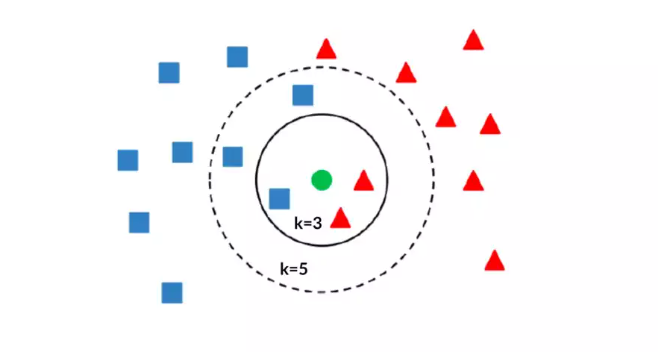

[Fuente de la imagen.](https://spotintelligence.com/2023/08/22/k-nearest-neighbours/) 

**Ventajas y Desventajas**

- Ventajas:

    - **Simplicidad:** Fácil de entender e implementar.

    - **Flexibilidad:** Puede usarse tanto para clasificación como para regresión.

- Desventajas:

    - **Eficiencia:** Puede ser lento para grandes conjuntos de datos debido al cálculo de distancias.

    - **Sensibilidad a la escala:** Los resultados pueden verse afectados por la escala de las características, por lo que es importante normalizar los datos.

## Conociendo los datos

Un proveedor de telecomunicaciones ha segmentado su base de clientes según patrones de uso del servicio, categorizando a los clientes en cuatro grupos o clases. El objetivo es saber si los datos demográficos se pueden utilizar para predecir la membresía de un cliente en una clase o segmento, para que con esto la empresa pueda personalizar ofertas para clientes potenciales. Lo anterior, es un problema de clasificación, es decir, dado el conjunto de datos con etiquetas predefinidas, se necesita construir un modelo para predecir la clase a la que pertenecerá un caso nuevo o en este caso un cliente. 

Para lo anterior, el ejercicio se centra en el uso de datos demográficos, tales como: **region**(región), **age**(edad), **marital**(estado civil), **income**(ingreso), entre otros, esto para predecir patrones de uso. El campo de destino, llamado **custcat**, tiene cuatro valores posibles que corresponden a las cuatro clases de clientes: 

1. **Basic Service** (Servicio Básico)

2. **Special Service** (Servicio Especial)

3. **Plus Service** (Servicio Plus)

4. **Total Service** (Servicio Total)

Para iniciar, lo primero será importar las bibliotecas y datos provenientes de un archivo csv, asimismo, hacer un EDA o análisis exploratorio de los datos.

In [1]:
# importar bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# leer los datos
df = pd.read_csv('../Data/teleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
# número de filas y columnas
df.shape 

(1000, 12)

Podemos observar que se tienen 1000 filas y 12 columnas o características. Veamos las estadísticas descriptivas de las columnas con la función describe() de pandas. 

In [5]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


Algo importante en la aplicación de algoritmos de clasificación, es que la cantidad de valores en cada clase esten equilibradas, es decir, que la diferencia entre estas no sea tan marcada; para ver la distribución de los valores de cada clase usamos la función value_counts() en la columna de destino (custcat).  

In [6]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Observamos que las clases están más o menos equilibradas. Bien, ahora veamos los histogramas para observar las distribuciones de los datos.

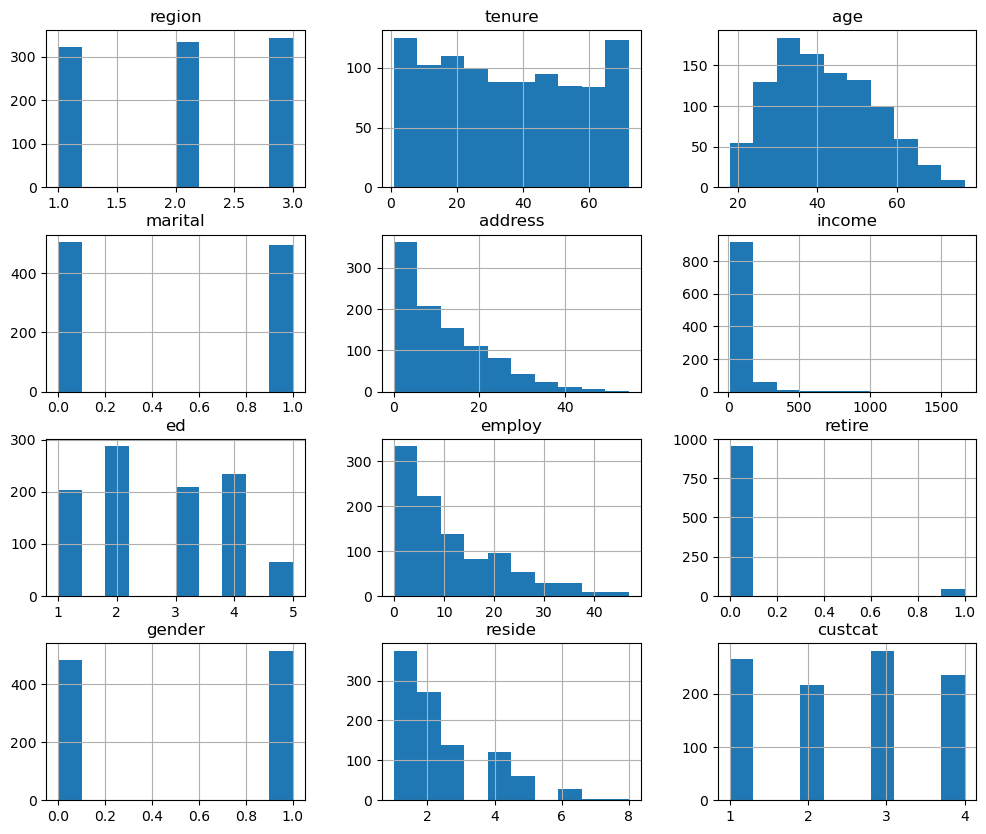

In [7]:
df.hist(figsize=(12, 10))
plt.show()

Lo siguiente será definir las variables **X** independientes o predictoras e **y** la variable dependiente u objetivo, mismas que convertiremos a arrays de numpy con la función values.

In [8]:
X = df.drop('custcat', axis=1).values # se elimina la variable objetivo del dataframe
y = df['custcat'].values
print('Forma de X:', X.shape)
print('Forma de y:', y.shape)

Forma de X: (1000, 11)
Forma de y: (1000,)


## Normalizar los datos

Normalizar los datos para un modelo de Machine Learning significa ajustar las características para que todas tengan la misma escala. Esto es crucial porque el algoritmo KNN se basa en la distancia entre puntos de datos para hacer predicciones. Si las características tienen diferentes escalas, algunas pueden dominar el cálculo de la distancia, lo que puede llevar a resultados incorrectos[(1)](https://www.ayuware.es/blog/que-significa-normalizar-datos/). Por ejemplo, si se tiene una característica que varía entre 1 y 1000 y otra que varía entre 0 y 1, la primera característica tendrá un impacto mucho mayor en la distancia calculada. Normalizar los datos asegura que cada característica contribuya de manera equitativa al cálculo de la distancia.

Para realizar lo anterior, importamos la función **StandardScaler** del modulo **preprocessing** de sklearn.

In [9]:
from sklearn.preprocessing import StandardScaler
# instanciamos el modulo 
scaler = StandardScaler()

In [10]:
# ajustar y transformar solo con los datos de X 
X = scaler.fit_transform(X)
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

Lo siguiente es dividir los datos en entrenamiento (train) y prueba (test), con una proporción de .80 y .20 respectivamente, para posteriormente iniciar con el modelo de clasificación.

In [11]:
# importar el modulo 
from sklearn.model_selection import train_test_split

# dividir los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Forma de los datos de entrenamiento:', X_train.shape, y_train.shape)
print('Forma de los datos de prueba:', X_test.shape, y_test.shape)

Forma de los datos de entrenamiento: (800, 11) (800,)
Forma de los datos de prueba: (200, 11) (200,)


## Clasificación

In [13]:
# importar la biblioteca de clasifuicación KNN
from sklearn.neighbors import KNeighborsClassifier

Como se habrán dado cuenta o intuido, el primer problema es elegir la cantidad de vecinos o el valor de **K**, aquí se muestra un método con base en la tasa de error.
Para encontar el valor óptimo de **K** hacemos uso de una función que mide la tasa de error en función de K, el valor será aquel que minimiza la tasa sin causar sobreajuste (overfitting) o subajuste (underfitting). El gráfico que se generará busca el punto donde la tasa de error es más baja y se mantenga relativamente estable. Es decir, si la tasa de error sigue disminuyendo a medida que aumenta K, pero luego comienza a aumentar nuevamente, el valor optimo de K estará cerca del punto más bajo antes de que comience a aumentar. 

In [14]:
# inicia lista para almacenar la tasa de error
error_rate = []

# bucle para tomar diferenrtes valores de K , en este caso 50 iteraciones (esto puede tardar un tiempo)
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i) # se crea un clasificador KNN con i vecinos
    knn.fit(X_train, y_train) # se ajusta a los datos de entrenamiento (X_train, y_train)
    y_pred_i = knn.predict(X_test) # predicciones sobre los datos de prueba (X_test) y se almacenan en y_pred_i
    error_rate.append(np.mean(y_pred_i != y_test)) # se calcula la tasa de error promedio comparando las predicciones vs las etiquetas reales de prueba y se almacena en la lista

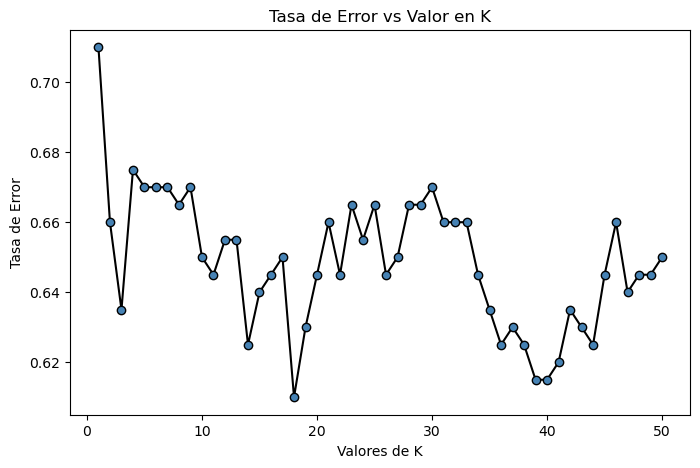

In [18]:
# Visualización de los resultados
plt.figure(figsize=(8,5))
plt.plot(range(1, 51), 
         error_rate, 
         color='black', 
         marker='o',
         markerfacecolor='steelblue', 
         markersize=6)
plt.title('Tasa de Error vs Valor en K')
plt.xlabel('Valores de K')
plt.ylabel('Tasa de Error')
plt.show()

Para este ejemplo definiremos K=14, creamos el objeto clasificador y entrenamos el modelo.

In [19]:
k = 14
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

Generamos las predicciones.

In [20]:
y_pred = knn_model.predict(X_test)

## Evaluación de la precisión

La evaluación de la precisión (accuracy) de un modelo KNN es una medida de qué tan bien el modelo está prediciendo las etiquetas correctas para los datos de prueba. La precisión se calcula como la proporción de predicciones correctas sobre el total de predicciones realizadas.

**Cálculo de la precisión:**
   - La precisión se calcula comparando las predicciones del modelo con las etiquetas verdaderas de los datos de prueba.
   - La fórmula para la precisión es:

$$
\text{Precisión} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
$$

**Interpretación:**
   - Una precisión alta indica que el modelo está haciendo un buen trabajo al predecir las etiquetas correctas.
   - Una precisión baja sugiere que el modelo no está prediciendo correctamente y puede necesitar ajustes, como cambiar el valor de K o mejorar la calidad de los datos.

Por ejemplo, si tienes un conjunto de datos de prueba con 100 muestras y el modelo KNN predice correctamente 90 de ellas, la precisión sería:

$$
\text{Precisión} = \frac{90}{100} = 0.90 \text{ o } 90\%
$$

La precisión es una métrica útil, pero no siempre es suficiente por sí sola, más adelante se muestran otra métricas.

In [101]:
# importar la metrica de evaluación
from sklearn.metrics import accuracy_score

# calcular la precisión 
print('Puntaje de precisión:', accuracy_score(y_test, y_pred))

Puntaje de precisión: 0.375


Observamos una precisión de 37.5%, no parece ser muy buena, en fin, sigamos con otras métricas de evaluación para nuestro modelo.

**Matriz de confusión (confusion matrix)**


La **matriz de confusión** es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. Es una tabla que permite visualizar las predicciones correctas e incorrectas realizadas por el modelo, desglosadas por cada clase.

Estructura de la Matriz de confusión:

En una matriz de confusión de 2x2 para un problema de clasificación binaria, las filas representan las clases reales y las columnas las clases predichas. Los elementos de la matriz son:

- **True Positive (TP) o Verdaderos Positivos**: Predicciones correctas de la clase positiva.

- **True Negative (TN) o Verdaderos Negativos**: Predicciones correctas de la clase negativa.

- **False Positive (FP) o Falsos Positivos**: Predicciones incorrectas de la clase positiva (error de tipo I).

- **False Negative (FN) o Falsos Negativos**: Predicciones incorrectas de la clase negativa (error de tipo II).

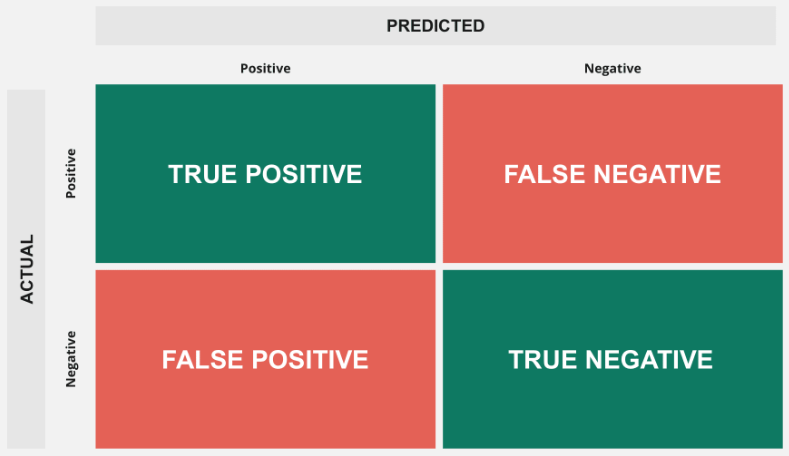


**Métricas:**

A partir de la matriz de confusión, se pueden calcular varias métricas importantes:

- **Accuracy (Exactitud):** Proporción de predicciones correctas.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision (Precisión):** Proporción de verdaderos positivos entre todas las predicciones positivas.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (Sensibilidad) o Tasa de Verdaderos Positivos:** Proporción de verdaderos positivos entre todas las instancias reales positivas.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **Specificity (Especificidad):** Proporción de verdaderos negativos entre todas las instancias reales negativas.
  $$
  \text{Specificity} = \frac{TN}{TN + FP}
  $$

Estas métricas ayudan a entender mejor el rendimiento del modelo e identificar áreas de mejora, lo anterior, de acuertdo a los objetivos del proyecto, es decir, cuál sería la clasificación que se quiere priorizar [(1)](https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python) [(2)](https://telefonicatech.com/blog/ml-a-tu-alcance-matriz-confusion).

Ahora generamos la matriz de confusión de nuestro modelo, para esto, lo primero será importar la función **confusion_matrix**.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
# generar la matriz con los valores actuales del conjunto test y los predichos
cm = confusion_matrix(y_test, y_pred)
cm

array([[28,  9, 15,  8],
       [ 9, 10,  9, 11],
       [13,  8, 28,  6],
       [16, 10, 11,  9]], dtype=int64)

In [25]:
# generar un dataframe con la matriz generada para una mejor comprensión
confusionMatriz = pd.DataFrame(
                                data=cm,
                                index=["Clase 1", "Clase 2", "Clase 3", "Clase 4"],
                                columns=["Clase 1", "Clase 2", "Clase 3", "Clase 4"]
                                )
confusionMatriz

,Clase 1,Clase 2,Clase 3,Clase 4
Clase 1,28,9,15,8
Clase 2,9,10,9,11
Clase 3,13,8,28,6
Clase 4,16,10,11,9


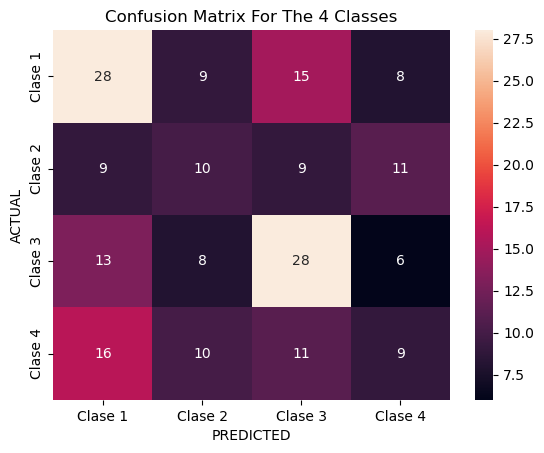

In [26]:
# generar el gráfico de calor con el dataframe de la matriz
sns.heatmap(confusionMatriz, annot=True, cbar=True)
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("Confusion Matrix For The 4 Classes")
plt.show()

Con el gráfico anterior podemos comparar los valores actuales o verdaderos (filas) vs los valores predichos del modelo (columnas), esto nos permite analizar de mejor manera nuestro modelo.

Como se mencionó, podemos obtener las métricas derivadas de la matriz, para esto, nos apoyamos de la función **classification_report** del mismo módulo **metrics**.

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.42      0.47      0.44        60
           2       0.27      0.26      0.26        39
           3       0.44      0.51      0.47        55
           4       0.26      0.20      0.23        46

    accuracy                           0.38       200
   macro avg       0.35      0.36      0.35       200
weighted avg       0.36      0.38      0.37       200



Observamos que las métricas no son lo mejor que quisieramos obtener, sin embargo, este ejercicio solo pretende ser un ejemplo práctico y sencillo de la aplicación de este modelo de clasificación. Bien, como sugerencia para mejorar nuestro modelo podría emplearse la eliminación de outliers o métodos de imputación de datos, la selección de caractertísticas basadas en correlaciones, o la ponderación de variables de acuerdo al negiocio, entre otras.

## ¿Qué es la regresión logística?

La **regresión logística** es una técnica de análisis de datos utilizada en Machine Learning para predecir la probabilidad de un resultado binario (como sí/no, verdadero/falso, comunmente representados como 1 y 0 respectivamente) basado en una o más variables independientes. Es especialmente útil para problemas de clasificación, donde el objetivo es asignar observaciones a una de dos categorías posibles.

¿Cómo funciona?

La regresión logística utiliza una función logística para modelar la relación entre las variables independientes y la probabilidad de un resultado específico. La fórmula básica es:

$$
\text{Logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k
$$

Donde:

- $( p )$ es la probabilidad de que ocurra el evento de interés.

- $( \beta_0 )$ es el intercepto.

- $( \beta_1, \beta_2, \ldots, \beta_k )$ son los coeficientes de las variables independientes $( X_1, X_2, \ldots, X_k )$.



**Aplicaciones**

La regresión logística se utiliza en diversas áreas, como:

- **Medicina:** Para predecir la presencia o ausencia de una enfermedad.

- **Marketing:** Para determinar la probabilidad de que un cliente realice una compra.

- **Finanzas:** Para evaluar el riesgo de crédito de un solicitante de préstamo.

Referencias [(1)](https://www.ibm.com/es-es/topics/logistic-regression) [(2)](https://aws.amazon.com/es/what-is/logistic-regression/)

Para el siguiente ejemplo de clasificación se hará uso de la regresión logística, pues se desea implementar un modelo que permita realizar la predicción de la enfermedad de diabetes en nuevos pacientes, con base en la probabilidad generada a partir de las características o columnas de los datos.

Entre las características de los pacientes que se incluyen en los datos están las siguientes:

- **Pregnancies embarazos**

- **Glucose o glucosa**

- **BloodPressure o presión arterial**

- **SkinThickness o grosor de la piel**

- **Insulin o insulina**

- **BMI o Índice de Masa Corporal (IMC)**

- **Pedigree o genealogía**

- **Age o edad**

Finalmente, la columna de resultado u objetivo:

- **Outcome**

### Conociendo los datos

Así como en el ejemplo de KNN se realiza un EDA o análisis exploratorio de los datos.

In [29]:
# cargar los datos desde el archivo csv
df_diabetes = pd.read_csv("../Data/diabetes.csv")
# mostrar los primeros 5 registros
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# imprimir la información del dataframe 
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Podemos observar que se tienen 768 filas y 9 columnas. Veamos las estadísticas descriptivas de las columnas con la función describe().

In [31]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Algo importante en la aplicación de algoritmos de clasificación como ya se mencionó, es que la cantidad de valores de cada clase en la variable objetivo, para ver la distribución de los valores de cada clase usamos la función value_counts() en la columna de destino (Outcome).

In [32]:
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Observamos que no existe un equilibrio en las clases, para este ejemplo lo dejeremos así por el momento dado los pocos registros, más adelante se muestra una opción para esta situación. 

Lo siguiente, será observar la distribución de las características mediante histogramas con la estimación de la densidad del kernel (KDE) que es un método para estimar la función de densidad de probabilidad (PDF), así como diagramas de caja y bigote.

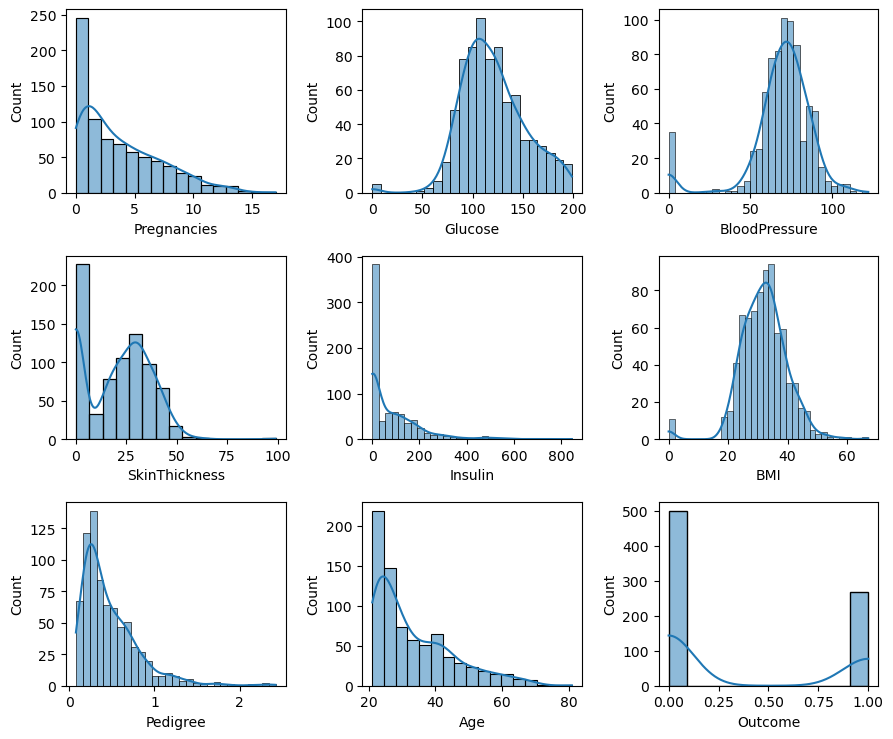

In [67]:
# Crear una figura con subplots
num_columns = len(df_diabetes.columns)
nrows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(9, 2.5 * nrows))

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre cada columna y crear un histograma con KDE
for i, column in enumerate(df_diabetes.columns):
    sns.histplot(df_diabetes[column], kde=True, ax=axes[i])
    #axes[i].set_title(f'Histograma y KDE de {column}')

# Eliminar subplots vacíos si hay menos columnas que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

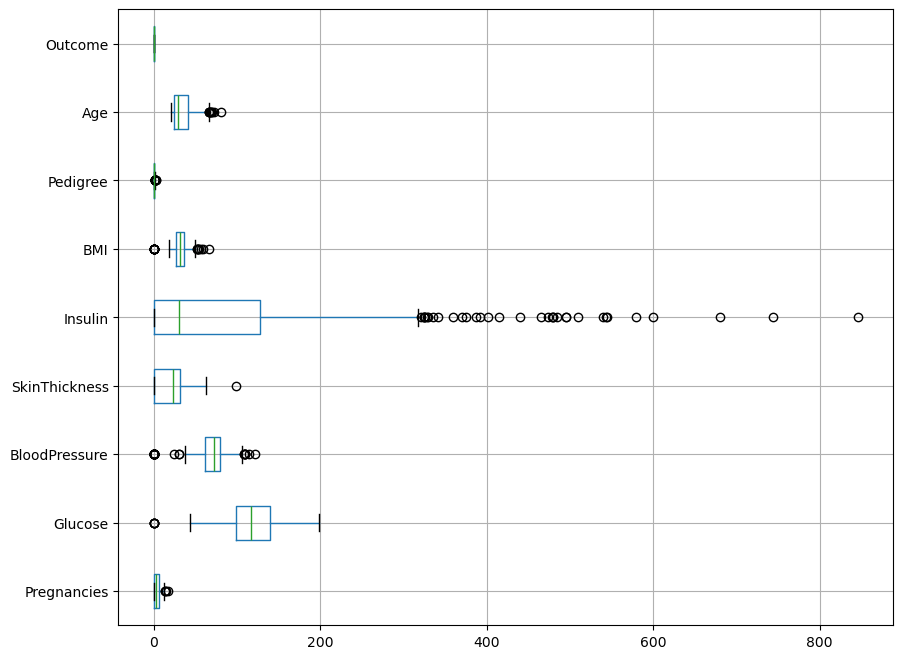

In [69]:
df_diabetes.boxplot(figsize=(10, 8), vert=False)
plt.show()

### Clasificación

Lo primero será dividir los datos en **X** correspondiente a las variables predictoras y la variable objetivo **y** en arrays, asimismo, en los conjuntos de entrenamiento (train) y prueba (test), los cuales serán transformados.  

In [71]:
X_diabetes = df_diabetes.drop('Outcome', axis=1).values
y_diabetes = df_diabetes['Outcome'].values

In [72]:
# ajustar y transformar solo con los datos de X 
X_diabetes = scaler.fit_transform(X_diabetes)
X_diabetes

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [79]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
print('Forma de los datos de entrenamiento:', X_train_diabetes.shape, "|", y_train_diabetes.shape)
print('Forma de los datos de prueba:', X_test_diabetes.shape, "|", y_test_diabetes.shape)

Forma de los datos de entrenamiento: (614, 8) | (614,)
Forma de los datos de prueba: (154, 8) | (154,)


In [80]:
# importar la función de regresión logística 
from sklearn.linear_model import LogisticRegression

In [81]:
# instanciar el objeto de Regresión Logística
log_reg = LogisticRegression()

In [82]:
# ajustar el modelo con los datos de entrenamiento 
log_reg.fit(X_train_diabetes, y_train_diabetes)

LogisticRegression()

Después de haber ajustado el modelo con los datos de entrenamiento, generamos las predicciones.

In [83]:
y_pred_diabetes = log_reg.predict(X_test_diabetes)

Veamos los primeros 12 valores predichos por nuestro modelo a fin de entender un poco más el trabajo del mismo.

In [85]:
y_pred_diabetes[:12]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

Como se mencionó, la predicción depende del valor de probabilidad obtenido, para entender mejor esto haremos uso del método **predict_proba()** del modelo de regresión logística, esto nos arroja una matriz de las n filas del conjunto test y dos columnas, la segunda es la que tiene el valor de la probabilidad entre 0 y 1.

In [86]:
y_pred_diabetes_prob = log_reg.predict_proba(X_test_diabetes)

Veamos la forma de la matriz.

In [89]:
y_pred_diabetes_prob.shape

(154, 2)

Veamos los valores de probabilidad de los 12 primeros registros.

In [90]:
y_pred_diabetes_prob[:12,1]

array([0.27719246, 0.18604865, 0.11473566, 0.17155968, 0.46840378,
       0.43957268, 0.01621254, 0.65909951, 0.5361339 , 0.77030737,
       0.25397559, 0.89131154])

Observamos que las probabilidades de 0.5 o más son asignadas a la clase 1 (sí o verdadera), en este caso, pronostico positivo de diabetes, esto pasa porque el umbral tiene una tasa de 0.5 por defecto, como se puede corroborar al comparar los registros 8, 9, 10 y 12 en ambos arrays. Cabe mencionar que se puede ajustar este umbral para ser más estricto o más permisivo en la clasificación. Por el momento, no ahondaremos en esta situación. 

Lo siguiente es evaluar nuestro modelo a través de las métricas antes vistas.  

### Evaluación del modelo

Precisión del modelo.

In [93]:
print("Puntuación de la precisión:", accuracy_score(y_test_diabetes, y_pred_diabetes))

Puntuación de la precisión: 0.7532467532467533


Matriz de confusión.

In [94]:
cm_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)
cm_diabetes

array([[79, 20],
       [18, 37]], dtype=int64)

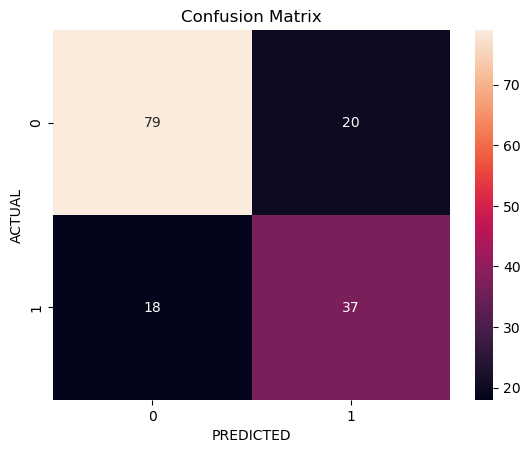

In [95]:
sns.heatmap(cm_diabetes, annot=True, cbar=True)
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("Confusion Matrix")
plt.show()

Finalmente, obtenemos las métricas derivadas de la matriz, para esto nos apoyamos de la función **classification_report**.

In [96]:
print('Métricas del reporte de clasificación:\n\n', classification_report(y_test_diabetes, y_pred_diabetes))

Métricas del reporte de clasificación:

               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Observamos que las métricas no son malas, sobre todo en las métricas para clasificar la clase 0, recordemos que se pueden aplicar diferentes técnicas para tratar de mejorar el modelo, esto ya dependerá del objetivo del negocio y la experiencia del analista.

### K-Fold o Validación Cruzada

Otra forma de evaluar nuestro modelo es mediante la validación cruzada o **K-Fold**, esta técnica es empleada principalmente para evaluar el rendimiento a través de la precisión, funciona de la siguiente manera: 

- **División de los datos**: Se divide al conjunto de datos en **K** subconjuntos de aproximadamente el mismo tamaño.

- **Subconjuntos train y test**: Se ralizan **K** iteraciones, en cada iteración un subconjunto se utiliza como prueba o test y los restantes subconjunto como entrenamiento (**K-1**) del modelo.

- **Promedio de precisión**: Se obtiene la media de la precisión de las **K** iteraciones, con lo que se obtiene el rendimiento del modelo.

Ejemplo de validación cruzada para 5 iteraciones:

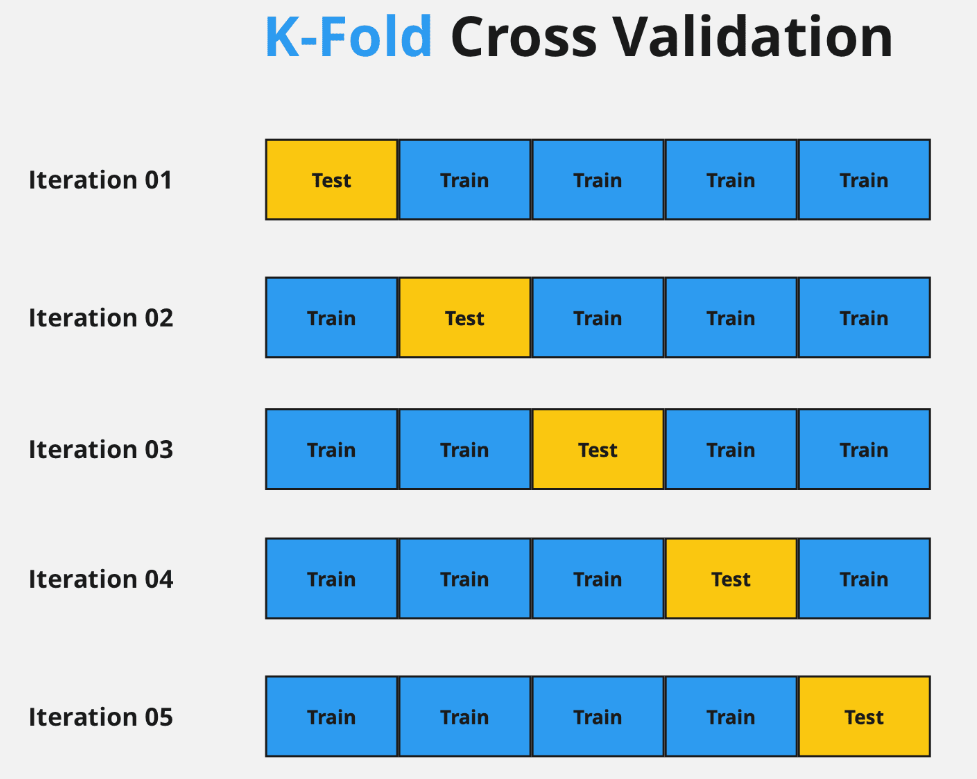

Este método ayuda a garantizar que el modelo no esté sobreajustado (overfitting) ni subajustado (underfitting), proporcionando una evaluación más robusta y fiable  [(1)](https://datascience.eu/es/aprendizaje-automatico/validacion-cruzada-de-k-fold/) [(2)](https://www.datacamp.com/es/tutorial/k-fold-cross-validation). Asimismo, es importante mencionar que la validación cruzada se usa cuando se tienen pocos datos y la variable objetivo no esta equilibarada en sus clases.

Aplicación de la técnica, primero se importa la función **KFold** desde el modulo **model_selection**.

In [97]:
from sklearn.model_selection import KFold 
# instanciar el objeto y definir en los parámetros el número de divisiones (n_splits=) y si estas divisiones serán aleatorios (shuffle=)  
kf = KFold(n_splits=5, shuffle=True)

Después de haber importado la función y definir sus parámetros es importante mostrar un poco más a detalle el proceso a fin de comprender como funciona, lo que hace la función es seleccionar y dividir aleatoriamente los índices de nuestros datos, para esto, se imprimen los mismos ya divididos mediante el método **split()** para los primeros 10 registros del conjunto "X_diabetes", los cuales almacenamos en una lista.

In [98]:
print(list(kf.split(X_diabetes[:10, :])))

[(array([0, 1, 2, 3, 4, 5, 6, 8]), array([7, 9])), (array([0, 2, 3, 4, 5, 6, 7, 9]), array([1, 8])), (array([0, 1, 3, 4, 6, 7, 8, 9]), array([2, 5])), (array([1, 2, 4, 5, 6, 7, 8, 9]), array([0, 3])), (array([0, 1, 2, 3, 5, 7, 8, 9]), array([4, 6]))]


Como podemos observar los indices de los 10 registros se dividen 5 veces de forma aleatoria, los primeros 8 corresponden al entrenamiento (train) y los 2 siguientes son los de prueba (test), esto para 5 iteraciones. 

Lo siguiente, será ya aplicar la validación cruzada para todo el conjunto de datos mediante el siguiente código.

In [100]:
# definir una lista para almacenar los resultados
list_scores = []
# realizar la validación mediante un bucle for 
for train_index, test_index in kf.split(X_diabetes):
    X_train_kf, X_test_kf = X_diabetes[train_index], X_diabetes[test_index]
    y_train_kf, y_test_kf = y_diabetes[train_index], y_diabetes[test_index]
    # con los datos divididos en cada iteración se entrena el modelo
    log_reg.fit(X_train_kf, y_train_kf)
    # se obtiene el resultado y se almacena en una lista 
    list_scores.append(log_reg.score(X_test_kf, y_test_kf))
# se imprime la lista 
print(list_scores,'\n')
# se imprime la media de los resultados obtenidos de la validación cruzada 
print('Resultado final de la media de los puntajes:', np.mean(list_scores))

[0.7597402597402597, 0.7337662337662337, 0.8246753246753247, 0.7320261437908496, 0.8169934640522876] 

Resultado final de la media de los puntajes: 0.7734402852049911


Finalmente, tendremos que entrenar nuestro modelo con todos los datos y sustentar el resultado de la eficiencia del mismo con el promedio obtenido.

Podemos observar que no existe una mejoría importante en el resultado de la validación cruzada respecto al puntaje de precisión que se obtuvo, sin embargo, es importante conocer las diferentes técnicas para evaluar nuestros modelos. 

------------------------------------------------------------

Liga para obtener código y datos:

https://github.com/LandinGabriel13/Modelos_de_clasificacion_KNN_y_Regresion_Logistica

Elaborado por: **Gabriel Armando Landín Alvarado**